In [1]:
import requests
import json
import pandas as pd
import numpy as np

In [41]:
# with open('./bike_test_friday.json', 'w+') as f:
#     f.write(json.dumps(bikes, sort_keys=True, indent=4))

In [4]:
f = open('./data/bike_test_friday.json')

In [5]:
bikes = json.load(f)

In [6]:
print(bikes[1]['commonName'])
for  i in bikes[1]['additionalProperties']:
    print(i['key'], i['value'])
print('lat', bikes[1]['lat'])
print('long', bikes[1]['lon'])

Phillimore Gardens, Kensington
TerminalName 001018
Installed true
Locked false
InstallDate 1278585780000
RemovalDate 
Temporary false
NbBikes 14
NbEmptyDocks 23
NbDocks 37
lat 51.499606
long -0.197574


In [14]:
# class BikeTimes():
#     def __init__(self):
#         self.date = datetime.now()
#         self.hour = self.date.hour
#         self.minute = self.date.minute
#         self.url = 'https://api.tfl.gov.uk/Place/Type/BikePoint'
#         self.data = requests.get(self.url).json()
        
#     def save_data(self):
#         with open(f'./bike_data_{self.hour}_{self.minute}', 'w+') as f:
#             f.write(json.dumps(self.data, sort_keys = True, indent = 4))
        
        

In [8]:
# BikeTimes().save_data()

In [16]:
# geo_test = requests.get(f"http://www.datasciencetoolkit.org/coordinates2statistics/{lat}%2c{lon}", params = {'statistics': 'population_density,elevation'}).json()


In [9]:
#cols = ['name', 'num_bikes', 'num_empty', 'num_docks', 'lat', 'lon']
bikes_list = []
for i in range(len(bikes)):
    name = bikes[i]['commonName']
    time = 't1'
    num_bikes = int(bikes[i]['additionalProperties'][-3]['value'])
    num_empty = int(bikes[i]['additionalProperties'][-2]['value'])
    num_docks = int(bikes[i]['additionalProperties'][-1]['value'])
    lat = bikes[i]['lat']
    lon = bikes[i]['lon']
    faulty = True if num_docks - num_empty - num_bikes > 0 else False
    
#     geo_test = requests.get(f"http://www.datasciencetoolkit.org/coordinates2statistics/{lat}%2c{lon}", params = {'statistics': 'population_density,elevation'}).json()
#     elevation = geo_test[0]['statistics']['elevation']['value']
#     pop_dens = geo_test[0]['statistics']['population_density']['value']
    
    bike_dict = {'name': name,
                 'time': time,
                 'num_bikes': num_bikes,
                 'num_empty': num_empty,
                 'num_docks': num_docks,
                 'coords': (lat,lon),
                 'faulty': faulty}
    
    bikes_list.append(bike_dict)

In [10]:
bikes_df = pd.DataFrame(bikes_list)

In [11]:
bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False


In [12]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
name         780 non-null object
time         780 non-null object
num_bikes    780 non-null int64
num_empty    780 non-null int64
num_docks    780 non-null int64
coords       780 non-null object
faulty       780 non-null bool
dtypes: bool(1), int64(3), object(3)
memory usage: 37.4+ KB


In [23]:
# Dont need to run this! Just use the pickle

geo_list = []
for bike in bikes_list:
    lat = bike['coords'][0]
    lon = bike['coords'][1]
    geo_test = requests.get(f"http://www.datasciencetoolkit.org/coordinates2statistics/{lat}%2c{lon}", params = {'statistics': 'population_density,elevation'}).json()
    elevation = geo_test[0]['statistics']['elevation']['value']
    pop_dens = geo_test[0]['statistics']['population_density']['value']
    geo_dict = {'coords': bike['coords'],
               'elevation': elevation,
               'pop_dens': pop_dens}
    geo_list.append(geo_dict)

In [38]:
pop_mean = geo_df.pop_dens.quantile(0.75)

In [39]:
pop_mean

10605.0

In [27]:
# geo_df = pd.DataFrame(geo_list).set_index('coords')

In [40]:
geo_df['high_pop?'] = geo_df.pop_dens > pop_mean

In [57]:
geo_df.head()

,elevation,pop_dens,high_pop?
coords,,,
"(51.529163, -0.10997)",31,10010,False
"(51.499606, -0.197574)",17,11436,True
"(51.521283, -0.084605)",27,10010,False
"(51.530059, -0.120973)",22,10010,False
"(51.507385, -0.09644)",16,10010,False


In [54]:
# geo_df.to_pickle('geo_dataframe')

In [16]:
geo_df = pd.read_pickle('geo_dataframe')

In [19]:
geo_df.head()

,elevation,pop_dens,high_pop?
coords,,,
"(51.529163, -0.10997)",31,10010,False
"(51.499606, -0.197574)",17,11436,True
"(51.521283, -0.084605)",27,10010,False
"(51.530059, -0.120973)",22,10010,False
"(51.507385, -0.09644)",16,10010,False


In [79]:
len(geo_df)

780

In [21]:
# Hill finder

hill_list = []
for n in range(len(geo_df)):
    lat_n = geo_df.index[n][0]
    lon_n = geo_df.index[n][1]
#     print (lat_n,lon_n)
    elev_list = []
    for i in range(len(geo_df)):
        lat_i = geo_df.index[i][0]
        lon_i = geo_df.index[i][1]
#         print(lat_i,lon_i)
        bol = ((lat_n-lat_i)**2 + (lon_n - lon_i)**2 < 0.000005)
        if bol:
            elev_list.append(geo_df.iloc[i].elevation)
    hill = (geo_df.iloc[n].elevation > np.mean(elev_list))
    hill_list.append(hill)

In [82]:
hill_list[:5]

[False, False, False, True, False]

In [22]:
geo_df['hill'] = hill_list

In [23]:
geo_df.head()

,elevation,pop_dens,high_pop?,hill
coords,,,,
"(51.529163, -0.10997)",31,10010,False,False
"(51.499606, -0.197574)",17,11436,True,False
"(51.521283, -0.084605)",27,10010,False,False
"(51.530059, -0.120973)",22,10010,False,True
"(51.507385, -0.09644)",16,10010,False,False


In [24]:
bikes_df = bikes_df.join(geo_df, on = 'coords')

In [25]:
bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False,31,10010,False,False
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True,27,10010,False,False
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False,22,10010,False,True
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False,16,10010,False,False


In [31]:
bikes_df.coords[0][0]

51.529163

In [40]:
faulty_list = []
for n in range(len(bikes_df)):
    lat_n = bikes_df.coords[n][0]
    lon_n = bikes_df.coords[n][1]
    faulty_near = 0
    for i in range(len(geo_df)):
        lat_i = bikes_df.coords[i][0]
        lon_i = bikes_df.coords[i][1]
        bol = ((lat_n-lat_i)**2 + (lon_n - lon_i)**2 < 0.000005)
        if bol:
            faulty_near += 1
    faulty_list.append(faulty_near)

In [41]:
bikes_df['num_faulty_near'] = faulty_list

In [52]:
bikes_df.head()

,name,time,num_bikes,num_empty,num_docks,coords,faulty,elevation,pop_dens,high_pop?,hill,num_faulty_near
0,"River Street , Clerkenwell",t1,4,15,19,"(51.529163, -0.10997)",False,31,10010,False,False,1
1,"Phillimore Gardens, Kensington",t1,14,23,37,"(51.499606, -0.197574)",False,17,11436,True,False,1
2,"Christopher Street, Liverpool Street",t1,25,6,32,"(51.521283, -0.084605)",True,27,10010,False,False,3
3,"St. Chad's Street, King's Cross",t1,20,3,23,"(51.530059, -0.120973)",False,22,10010,False,True,3
4,"New Globe Walk, Bankside",t1,7,12,19,"(51.507385, -0.09644)",False,16,10010,False,False,1


In [49]:
bikes_df.num_faulty_near.value_counts().apply(lambda x : np.log(x))

1     6.042633
2     5.505332
3     4.430817
4     2.564949
5     2.197225
7     1.386294
6     0.693147
10    0.000000
Name: num_faulty_near, dtype: float64

In [54]:
bikes_df.num_faulty_near.value_counts()

1     421
2     246
3      84
4      13
5       9
7       4
6       2
10      1
Name: num_faulty_near, dtype: int64

In [26]:
import seaborn as sns

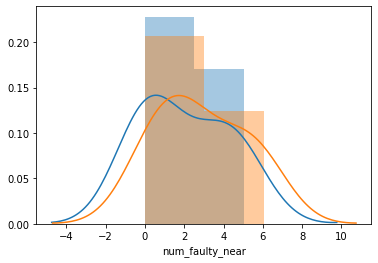

In [59]:
sns.distplot(bikes_df.loc[bikes_df['faulty'] == True].num_faulty_near.value_counts().apply(lambda x : np.log(x)))
sns.distplot(bikes_df.num_faulty_near.value_counts().apply(lambda x : np.log(x)))